In [6]:
%matplotlib inline
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=7)
import matplotlib.pyplot as plt
import math 
import pandas as pd
from numpy import linalg as LA
from sympy import * 

In [7]:
# Scale function
def scale(vec_1):
    
    # Test
    v1_scale = np.square(np.linalg.norm(vec_1))
#     print(v1_scale)

    v1 = np.multiply(1/np.sqrt(v1_scale + 1e-15),vec_1)
#     print(v1)
    
    return list(v1)
    
    
def QR(span):
    
    # Setup arrays
    # Original Values
    vector = []
    # Normalized Values
    vec_norm = []

    # Size of array
    row,col = span.shape
    
    # First Column
    v1 = span[:,0]
    vec_1 = v1
    vector.append(vec_1)

    v1 = scale(vec_1)
    vec_norm.append(v1)
    
    # Subsequent Columns

    start = 1
    end = col

    for j in range(start,end):

        # Column
        projection = span[:,j]
        v = span[:,j]

        #Orthonormal vector
        for i in range(len(vec_norm)):
            #projection
            # dot
            proj_dot = np.dot(v,vec_norm[i])/(np.dot(vec_norm[i],vec_norm[i]) + 1e-15)
            proj = np.multiply(proj_dot,vec_norm[i])
            projection = projection - proj

        v_norm = scale(projection)

        vec_norm.append(v_norm)
        
    # Calculate R
    Q = vec_norm
    Q = np.array(Q)
    R = np.dot(Q,span)
    R = np.array(R)

    
    return Q.T,R

def eigenspace(span):
    
    eig_vec = np.eye(span.shape[0])
    X = span.copy()

    for _ in range(100):
        Q,R = QR(X)
        eig_vec = np.dot(eig_vec,Q)
        X = np.dot(R,Q)
        eig_val = np.diag(X)
        
    return eig_val,eig_vec, X

def CoV(df):
    
    # Shape of dataframe
    row,col = df.shape
    print(row,col)
    
    # Determine indices
#     if row > col:
#         row = col
#         col = row
    
    # Initialize Covariance matrix
    CoVar = np.zeros((col,col))
    
    # List of means
    stats = []
    for i in range(col):
        stats.append(df.iloc[:,i].mean())

    # Solve covariance matrix        
    for k in range(col):
        for i in range(col):
            var = 0
            for j in range(row):
                var = var + ((df.iloc[j,k] - stats[k])*(df.iloc[j,i] - stats[i]))/(row-1)
            CoVar[k][i] = var
        
    return CoVar
    
    


In [8]:
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]

# x = [7,4,6,8,8,7,5,9,7,8]
# y = [4,1,3,6,5,2,3,5,4,2]
# z = [3,8,5,1,7,9,3,8,5,2]

# xyz = np.array([[7,4,3],[4,1,8],[6,3,5],[8,6,1],[8,5,7],[7,2,9],[5,3,3],[9,5,8],[7,4,5],[8,2,2]])
# X = pd.DataFrame(xyz)
# print(X)

# f1 = [1,5,1,5,8]
# f2 = [2,5,4,3,1]
# f3 = [3,6,2,2,2]
# f4 = [4,7,3,1,2]

[[-6.2530162e-01 -1.7006366e-01]
 [ 9.6069503e-01  5.9090060e-01]
 [-5.9854339e-01 -4.0259339e-01]
 [-2.2280594e+00 -5.3257674e-01]
 [-4.6143006e-01 -4.9886724e-01]
 [-9.5892903e-01 -2.6933102e-01]
 [-6.7307991e-01 -3.3830855e-01]
 [ 1.3050186e+00  5.9135785e-01]
 [ 3.7454560e-01 -9.8544205e-02]
 [-1.8262863e+00 -4.0617025e-01]
 [ 6.6826228e-01  3.3687740e-01]
 [-5.8264668e-01 -1.7736922e-01]
 [-4.1812898e-01 -3.7381139e-01]
 [ 1.7220937e-01  2.6466884e-01]
 [ 3.7711669e-01  1.8844297e-01]
 [-6.7939623e-01 -1.3160198e-01]
 [ 1.0314896e+00  4.2555002e-01]
 [ 3.3604180e-01  3.9098272e-02]
 [ 7.0574599e-01  4.8873065e-01]
 [ 8.3951155e-01  1.5212587e-01]
 [ 1.4988290e+00  4.7138081e-01]
 [ 2.8835664e-01  3.3133471e-02]
 [-5.0293501e-01 -3.6866543e-01]
 [ 1.4792107e+00  7.4044572e-01]
 [-4.4438243e-01 -1.6501936e-01]
 [-5.3346423e-01 -6.0222191e-02]
 [-6.1622942e-01 -2.1178392e-01]
 [ 7.4659897e-02 -6.1432108e-02]
 [-1.1363701e-01  7.3287768e-02]
 [-2.0071730e-02  6.0974459e-02]
 [ 1.89582

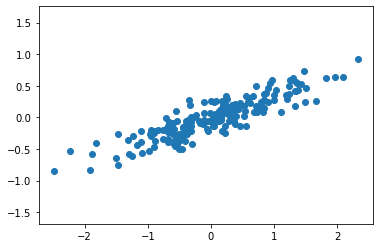

In [9]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

print(X)

In [10]:
# Create dataframe.
df = pd.DataFrame([x,y])
df = df.transpose()
df_copy = df.copy()
df.columns = ['x','y']
print(df)
print(df.shape)
row,col = df.shape
print(row)
print(col)
print(df.mean())
print(df.std())

     x    y
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9
(10, 2)
10
2
x    1.81
y    1.91
dtype: float64
x    0.785211
y    0.846496
dtype: float64


In [11]:
# Covariance
# df_2 = (df - df.mean())/df.std()
df_2 = df - df.mean()
cov = CoV(df_2)
print(cov)

10 2
[[0.6165556 0.6154444]
 [0.6154444 0.7165556]]


In [12]:
# Eigenspace
eig_val,eig_vec, x_val = eigenspace(cov)
print(eig_val)
print(eig_vec)


[1.2840277 0.0490834]
[[ 0.6778734 -0.7351787]
 [ 0.7351787  0.6778734]]


In [13]:
# Row Feature Vector
row_feature_vector = eig_vec.T
print(row_feature_vector)

[[ 0.6778734  0.7351787]
 [-0.7351787  0.6778734]]


In [14]:
# Final Data
FinalData = row_feature_vector.dot(df_2.T)
print(FinalData)
print(type(FinalData))

[[ 0.8279702 -1.7775803  0.9921975  0.2742104  1.6758014  0.9129491 -0.0991094 -1.1445722 -0.4380461 -1.2238206]
 [-0.1751153  0.1428572  0.384375   0.1304172 -0.2094985  0.1752824 -0.3498247  0.0464173  0.0177646 -0.1626753]]
<class 'numpy.ndarray'>


In [15]:
# # Final Step
# # Select top two eigen values
# A = eig_vec
# # A = pd.Series(A)
# A = pd.DataFrame(A)
# # A = A.transpose()
# print(A)

# # df_0 = (df - df.mean())/df.std()
# df_0 = df - df.mean()
# # df_0 = df_0.transpose()
# print(df_0)
# # df_1 = df_0.loc[0:3,:]
# df_1 = df_0
# print(df_1)

# # A*df_0.transpose()
# Y = df_1.dot(A.T)
# print(Y)

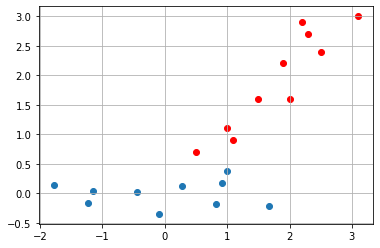

In [16]:
plt.scatter(FinalData[0],FinalData[1])
plt.scatter(x,y,color='red')
plt.grid()

In [17]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(FinalData)

print(pca.components_)

print(pca.explained_variance_)


[[ 0.28959   -0.5544288  0.1754779  0.041513   0.5442846  0.2129638  0.0723813 -0.3438377 -0.1315922 -0.3063518]
 [ 0.5842701  0.279608   0.5281192  0.0116285 -0.0180114  0.1934246 -0.0524913  0.0253403 -0.1648657  0.4827909]]
[5.9990000e+00 2.3016453e-32]
